### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [115]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [117]:
data = pd.read_csv('data/coupons.csv')


has_nan = data.isnull().values.any()
if has_nan:
    total_rows = len(data)
    # Calculate percentage of NaN values per column
    nan_percentage = (data.isnull().sum() / total_rows) * 100

    # Filter only columns that have NaN values
    nan_columns = nan_percentage[nan_percentage > 0]
    print('Percentage of NaN values per column if any NaN exists:')
    print(nan_columns.map(lambda x: str(x)+'%'))    


Percentage of NaN values per column if any NaN exists:
car                      99.14853358561967%
Bar                     0.8435824660990224%
CoffeeHouse             1.7108167770419427%
CarryAway               1.1904761904761905%
RestaurantLessThan20    1.0249132765689057%
Restaurant20To50         1.490066225165563%
dtype: object


# Observation of nan values:
- Percentage of rows without any NaN values:  0.85%. 
    * Removing all rows with th NaN values will result in loss of 99.15% of data. 
- Car column has 99.15% NaN values. 
    * This column may not be useful for our analysis. 
    * This column will be dropped.
- NaN values will be replaced with '' for all columns other than car,   


In [118]:

new_data= data.drop(columns=['car'])

for col in nan_columns.index:
    if col != 'car':
        new_data[col] = new_data[col].fillna('')


4. What proportion of the total observations chose to accept the coupon?



In [119]:
data_coupons_accepted = data[data['Y']==1]
print('Percetage accepted coupon: :{:.2f}%'.format(len(data_coupons_accepted)/len(data)*100))


Percetage accepted coupon: :56.84%


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon Distribution')

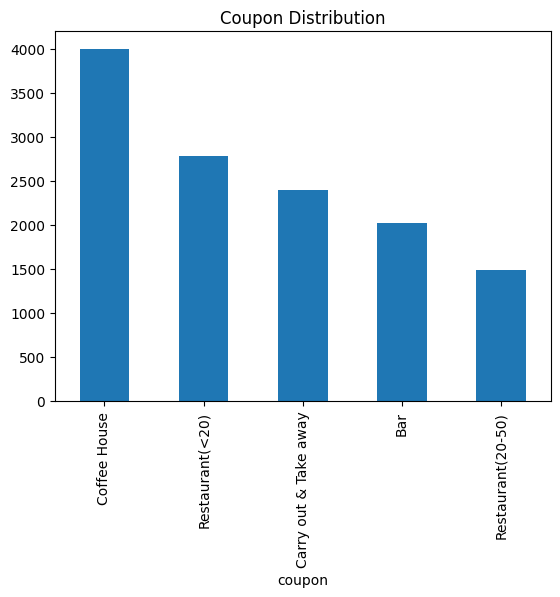

In [120]:
data['coupon'].value_counts().plot(kind='bar')
plt.title('Coupon Distribution')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Coupon Distribution')

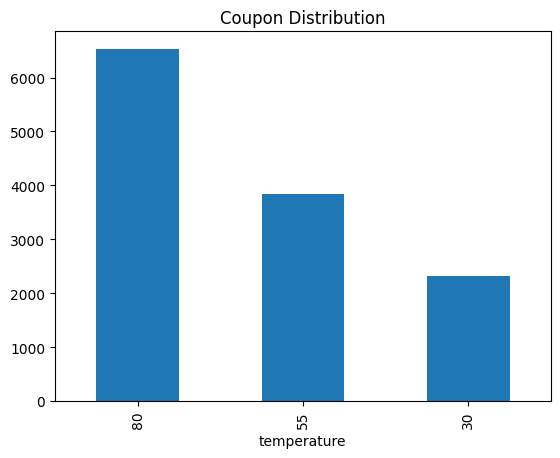

In [121]:
data['temperature'].value_counts().plot(kind='bar')
plt.title('Coupon Distribution')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [122]:
data_bar= data[data['coupon']=='Bar']



2. What proportion of bar coupons were accepted?


In [123]:
filter_bar_accept=data_bar['Y']==1
acceptance_rate_bar_coupon=len(data_bar[filter_bar_accept])/len(data_bar)*100
print("Percentage of bar coupons accepted:{:.2f}%".format(acceptance_rate_bar_coupon))

Percentage of bar coupons accepted:41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [124]:
filer_3_or_less=data_bar['Bar'].isin(['never', 'less1', '1~3'])
data_bar_goers_less_often=data_bar[(filter_bar_accept) &  (filer_3_or_less)]
acceptance_rate_less_often = len(data_bar_goers_less_often)/len(data_bar)*100
data_bar_goers_more_often = data_bar[filter_bar_accept &  (data_bar['Bar'].isin(['gt8', '4~8']))]
acceptance_rate_more_often =len(data_bar_goers_more_often)/len(data_bar)*100



Acceptance rate between those who went to a bar 3 or fewer times a month:33.02%  

Acceptance rate between those who went to a bar 4 or more times a month: 7.59%
# Summary: 
    Those who goes bar 3 or less times a month are more likely to accept the coupon

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [125]:
filter_more_than_once=data_bar['Bar'].isin([ '1~3','gt8', '4~8'] )
filter_older_than_25 = data_bar['age'].isin(['46', '26', '31', '41', '50plus', '36'])
data_bar_coupons_older_25=data_bar[(filter_bar_accept)&(filter_more_than_once) &(filter_older_than_25) ]
acceptance_rate_older_25 = len(data_bar_coupons_older_25)/len(data_bar )*100
acceptance_rate_all_others = acceptance_rate_bar_coupon - acceptance_rate_older_25


Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25: 14.48%
Acceptance rate for other drivers:26.52%
# Summary: 
    Those who goes bar less than 1 times a month or yonger than 25 are more likely to accept the coupon

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [126]:
acceptance_rate_more_than_once = len(data_bar[(filter_bar_accept)&(filter_more_than_once)])/len(data_bar)*100
print('Acceptance rate for drivers who go to bars more than once a month : {:.2f}%'.format(acceptance_rate_more_than_once))

filer_no_farm_occupation =~data_bar['occupation'].isin(['Unemployed','Farming Fishing & Forestry'])
filter_passanger_not_kid = data_bar['passanger']!='Kid(s)'
data_bar_coupons_with_nokid_passengers_no_farm_occupation =data_bar[(filter_bar_accept)&(filter_passanger_not_kid) & (filer_no_farm_occupation)]
acceptance_rate_with_nokid_passengers_no_farm_occupation = len(data_bar_coupons_with_nokid_passengers_no_farm_occupation)/len(data_bar)*100


Acceptance rate for drivers who go to bars more than once a month : 20.33%


Acceptance rate for drivers who go to bars more than once a month : 20.33%
Acceptance rate for drivers who had passengers that were not a kid and had occupations other than farming, fishing, or forestry :34.36%

# Summary 
    Drivers who had passengers that were not a kid and had occupations other than farming, fishing, or forestry more likely to accept the coupon

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [127]:


filter_age_under_30 = data_bar['age'].isin(['below21','21','26'])
filter_cheap_restaurant_often =data_bar['RestaurantLessThan20'].isin(['4~8',  'gt8'])
filter_not_widowed= data_bar['maritalStatus']!='Widowed'

filter_income_under_50k = data_bar['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499','$37500 - $49999'])
data_not_kid_not_widowed = data_bar[(filter_bar_accept) &(filter_more_than_once) &(filter_passanger_not_kid) &(filter_not_widowed)]

data_bar_often_under_30 = data_bar[(filter_bar_accept)& (filter_age_under_30) &(filter_more_than_once)]
data_bar_cheap_restaurant_under_50k = data_bar[(filter_bar_accept)& (filter_cheap_restaurant_often) &(filter_income_under_50k)]


Acceptance rates for going to bars more than once a month, had passengers that were not a kid, and were not widowed:19.48%
Acceptance rates for going to bars more than once a month and are under the age of 30: 12.35%
Acceptance rates for going to cheap restaurants more than 4 times a month and income is less than 50K:7.73%

# Summary:
    Those drivers who go to bar more than once a month and with adult passengers are most likely to accept the coupon.
    THose drivers who go to bar more than once 4 times a month and income less than $50K are less likely to accept the coupon.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The following drivers are likely to acceccept the bar coupons:
1.	Those drivers who had passengers that were not a kid and had occupations other than farming, fishing, or forestry
2.	Those drivers who went to a bar 3 or fewer times a month
	


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### Investigate the top 10 feature values with the highest mutual information score with the coupon on acceptance label 'Y'

Text(0.5, 1.0, 'Top 10 Features with Highest Mutual Information Score with Coupon Acceptance')

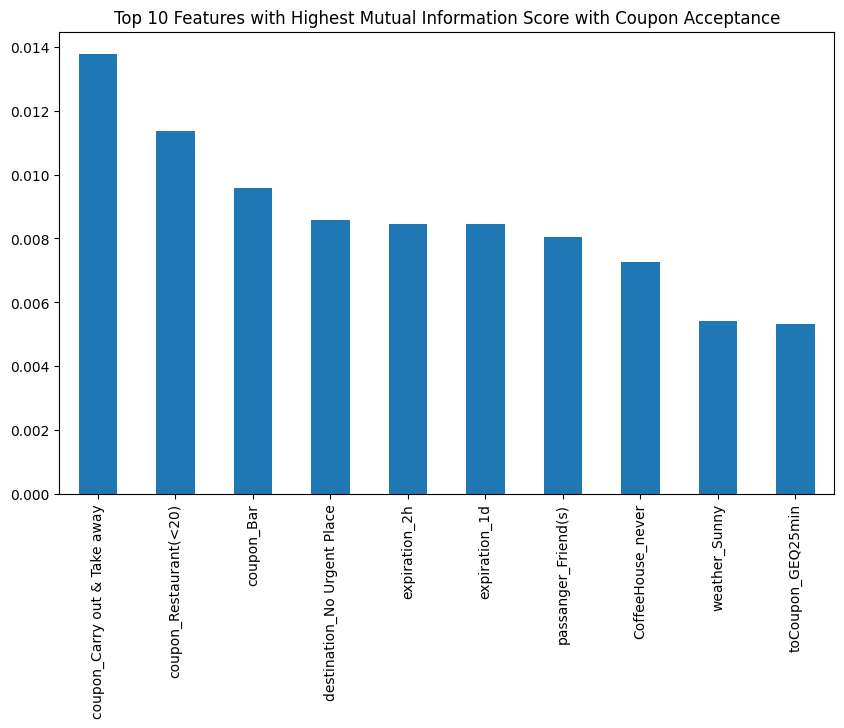

In [134]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
data = pd.read_csv('data/coupons.csv')
# Assuming df is your dataframe with categorical variables and 'Y'
X = data.drop(columns=['Y'])  # Drop target column
y = data['Y']

# Convert categorical variables to numerical if needed
X = pd.get_dummies(X)

# Compute mutual information
mi = mutual_info_classif(X, y, discrete_features=True)

# Rank features
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

mi_series.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Features with Highest Mutual Information Score with Coupon Acceptance')


The chart above shows the following are most important factors for drivers to accept the bar coupons:
Coupons:  Carry out & Take away, Restaurant(<20), Bar
destination: No Urgent Place
passanger:Friend(s)           
CoffeeHouse: never            
weather: Sunny                  
toCoupon:GEQ25min


### Pair plot for the coupons columns related to the top 10 factors for coupon accetceptance

In [15]:
''' common code for later analysis'''
def label_encode(new_data, doprint=False):
    label_encoders = {}
    label_mappings = {}
    for col in new_data.columns:
        le = LabelEncoder()
        
        new_data.loc[:,col] = le.fit_transform(new_data[col])
        label_encoders[col] = le  # Store encoders if you need to decode later
        label_mappings[col] = dict(enumerate(le.classes_))  #
    if doprint:
        for col, mapping in label_mappings.items():
            print(f"Mapping for column '{col}': {mapping}")
    return new_data

Mapping for column 'coupon': {0: 'Bar', 1: 'Carry out & Take away', 2: 'Coffee House', 3: 'Restaurant(20-50)', 4: 'Restaurant(<20)'}
Mapping for column 'Y': {0: 0, 1: 1}
Mapping for column 'destination': {0: 'Home', 1: 'No Urgent Place', 2: 'Work'}
Mapping for column 'passanger': {0: 'Alone', 1: 'Friend(s)', 2: 'Kid(s)', 3: 'Partner'}
Mapping for column 'CoffeeHouse': {0: '1~3', 1: '4~8', 2: 'gt8', 3: 'less1', 4: 'never', 5: nan}
Mapping for column 'weather': {0: 'Rainy', 1: 'Snowy', 2: 'Sunny'}
Mapping for column 'toCoupon_GEQ25min': {0: 0, 1: 1}


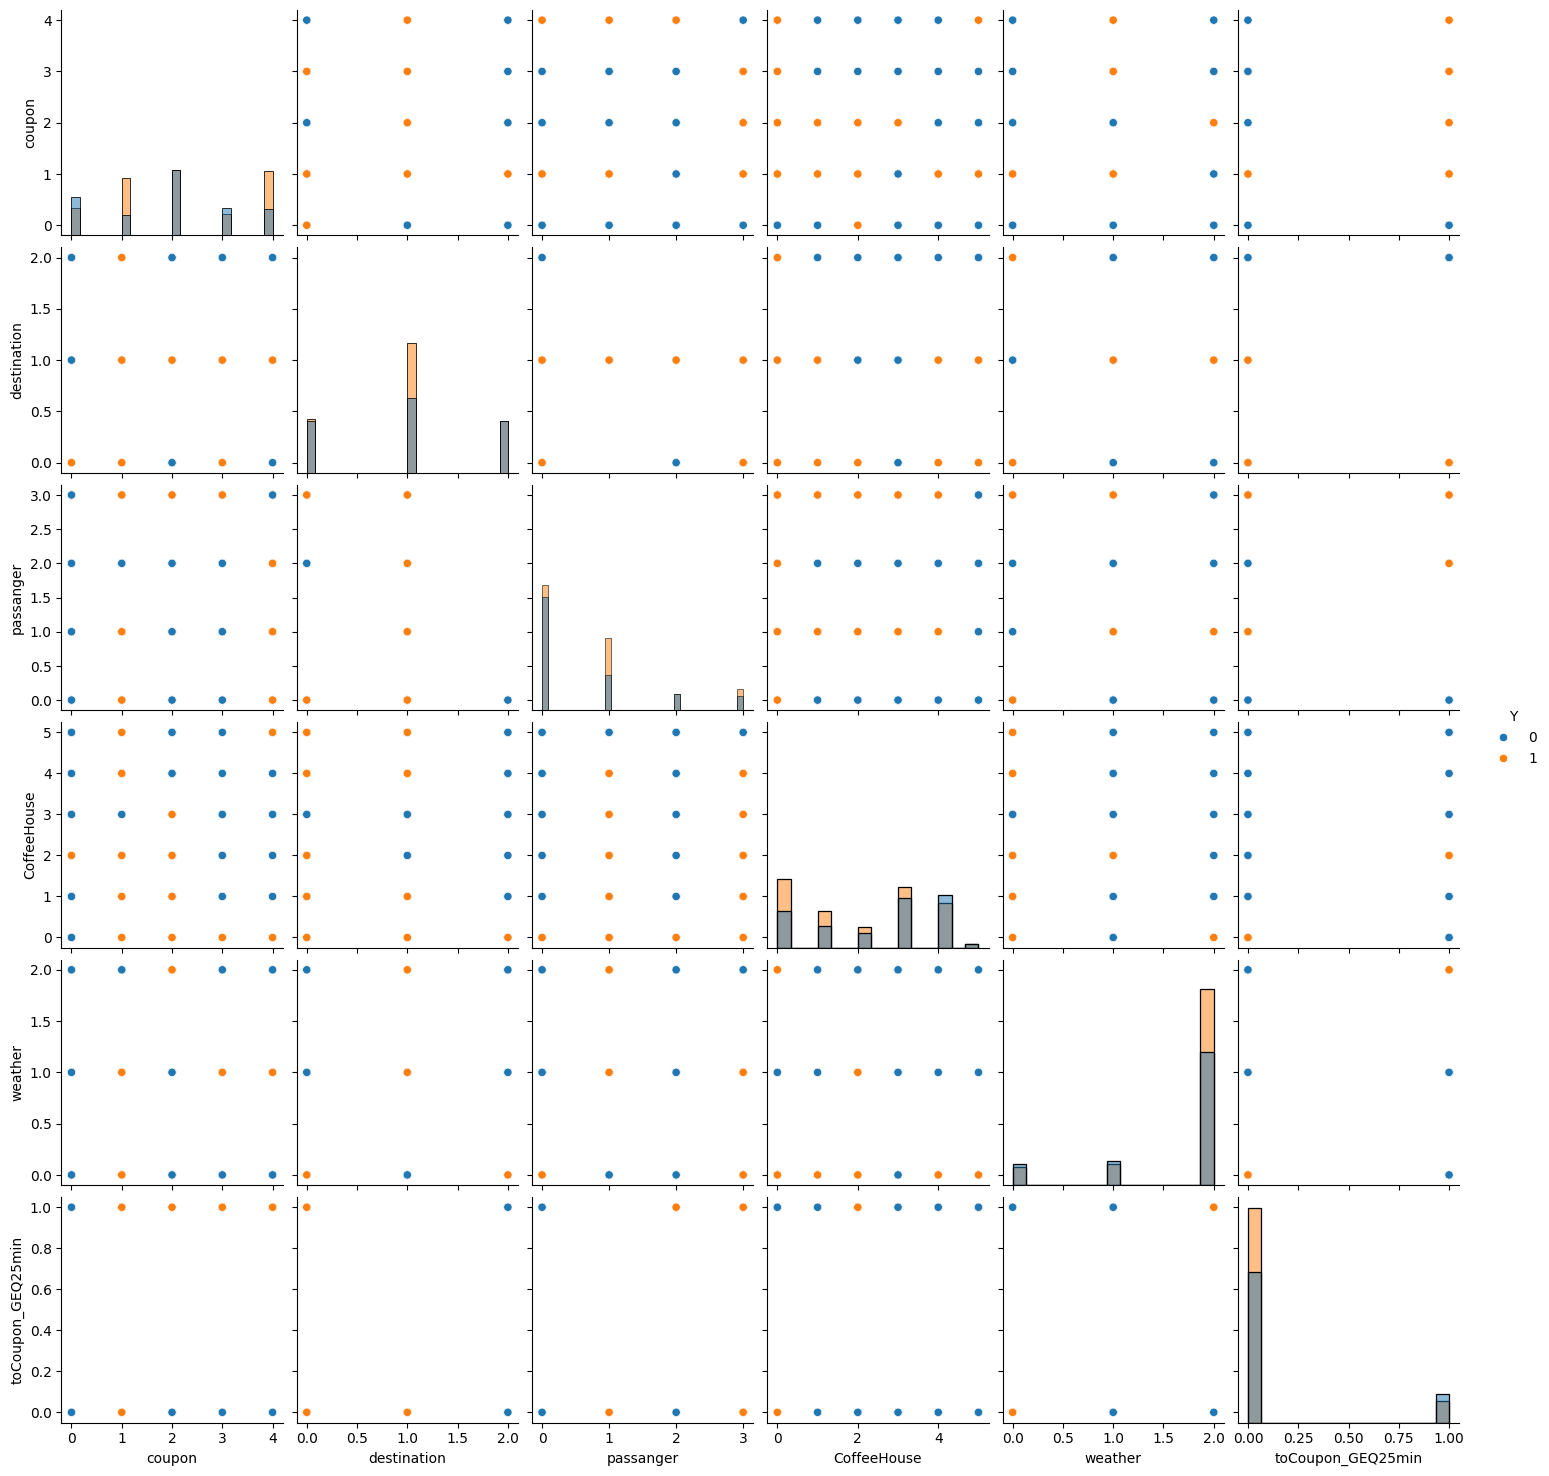

In [16]:
data = pd.read_csv('data/coupons.csv')


new_data=data[['coupon','Y','destination','passanger','CoffeeHouse','weather','toCoupon_GEQ25min']]
new_data = label_encode(new_data, True)

    

sns.pairplot(new_data, hue='Y',diag_kind='hist')


#### Investigate which coupons are more popular

    - The following shows clearly that 'Carry out & Take away' or 'Restaurant(20-50)' coupons are the most popular.

Text(0.5, 1.0, 'Acceptance Rate by Coupon')

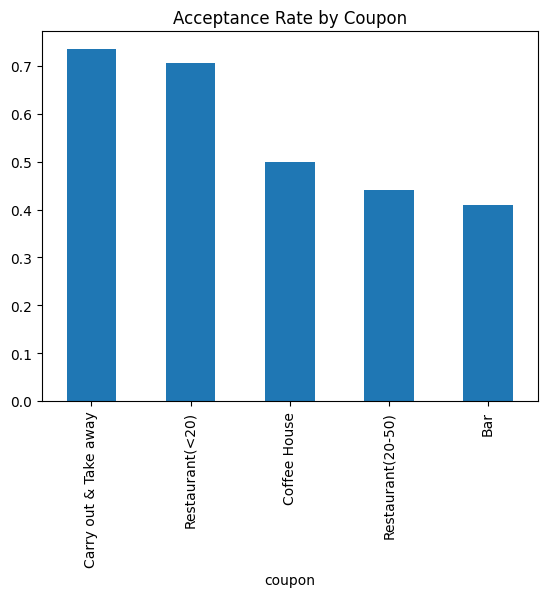

In [131]:

accept_rate_by_coupon = data.groupby('coupon')['Y'].mean().sort_values(ascending=False)
accept_rate_by_coupon.plot(kind='bar')
plt.title('Acceptance Rate by Coupon')


#### Investigate what kind of drivers are more likely to accept coupons

Mapping for column 'coupon': {0: 'Bar', 1: 'Carry out & Take away', 2: 'Coffee House', 3: 'Restaurant(20-50)', 4: 'Restaurant(<20)'}
Mapping for column 'Y': {0: 0, 1: 1}
Mapping for column 'age': {0: '21', 1: '26', 2: '31', 3: '36', 4: '41', 5: '46', 6: '50plus', 7: 'below21'}
Mapping for column 'income': {0: '$100000 or More', 1: '$12500 - $24999', 2: '$25000 - $37499', 3: '$37500 - $49999', 4: '$50000 - $62499', 5: '$62500 - $74999', 6: '$75000 - $87499', 7: '$87500 - $99999', 8: 'Less than $12500'}
Mapping for column 'maritalStatus': {0: 'Divorced', 1: 'Married partner', 2: 'Single', 3: 'Unmarried partner', 4: 'Widowed'}
Mapping for column 'RestaurantLessThan20': {0: '1~3', 1: '4~8', 2: 'gt8', 3: 'less1', 4: 'never', 5: nan}
Mapping for column 'Restaurant20To50': {0: '1~3', 1: '4~8', 2: 'gt8', 3: 'less1', 4: 'never', 5: nan}
Mapping for column 'has_children': {0: 0, 1: 1}
Mapping for column 'education': {0: 'Associates degree', 1: 'Bachelors degree', 2: 'Graduate degree (Masters or 

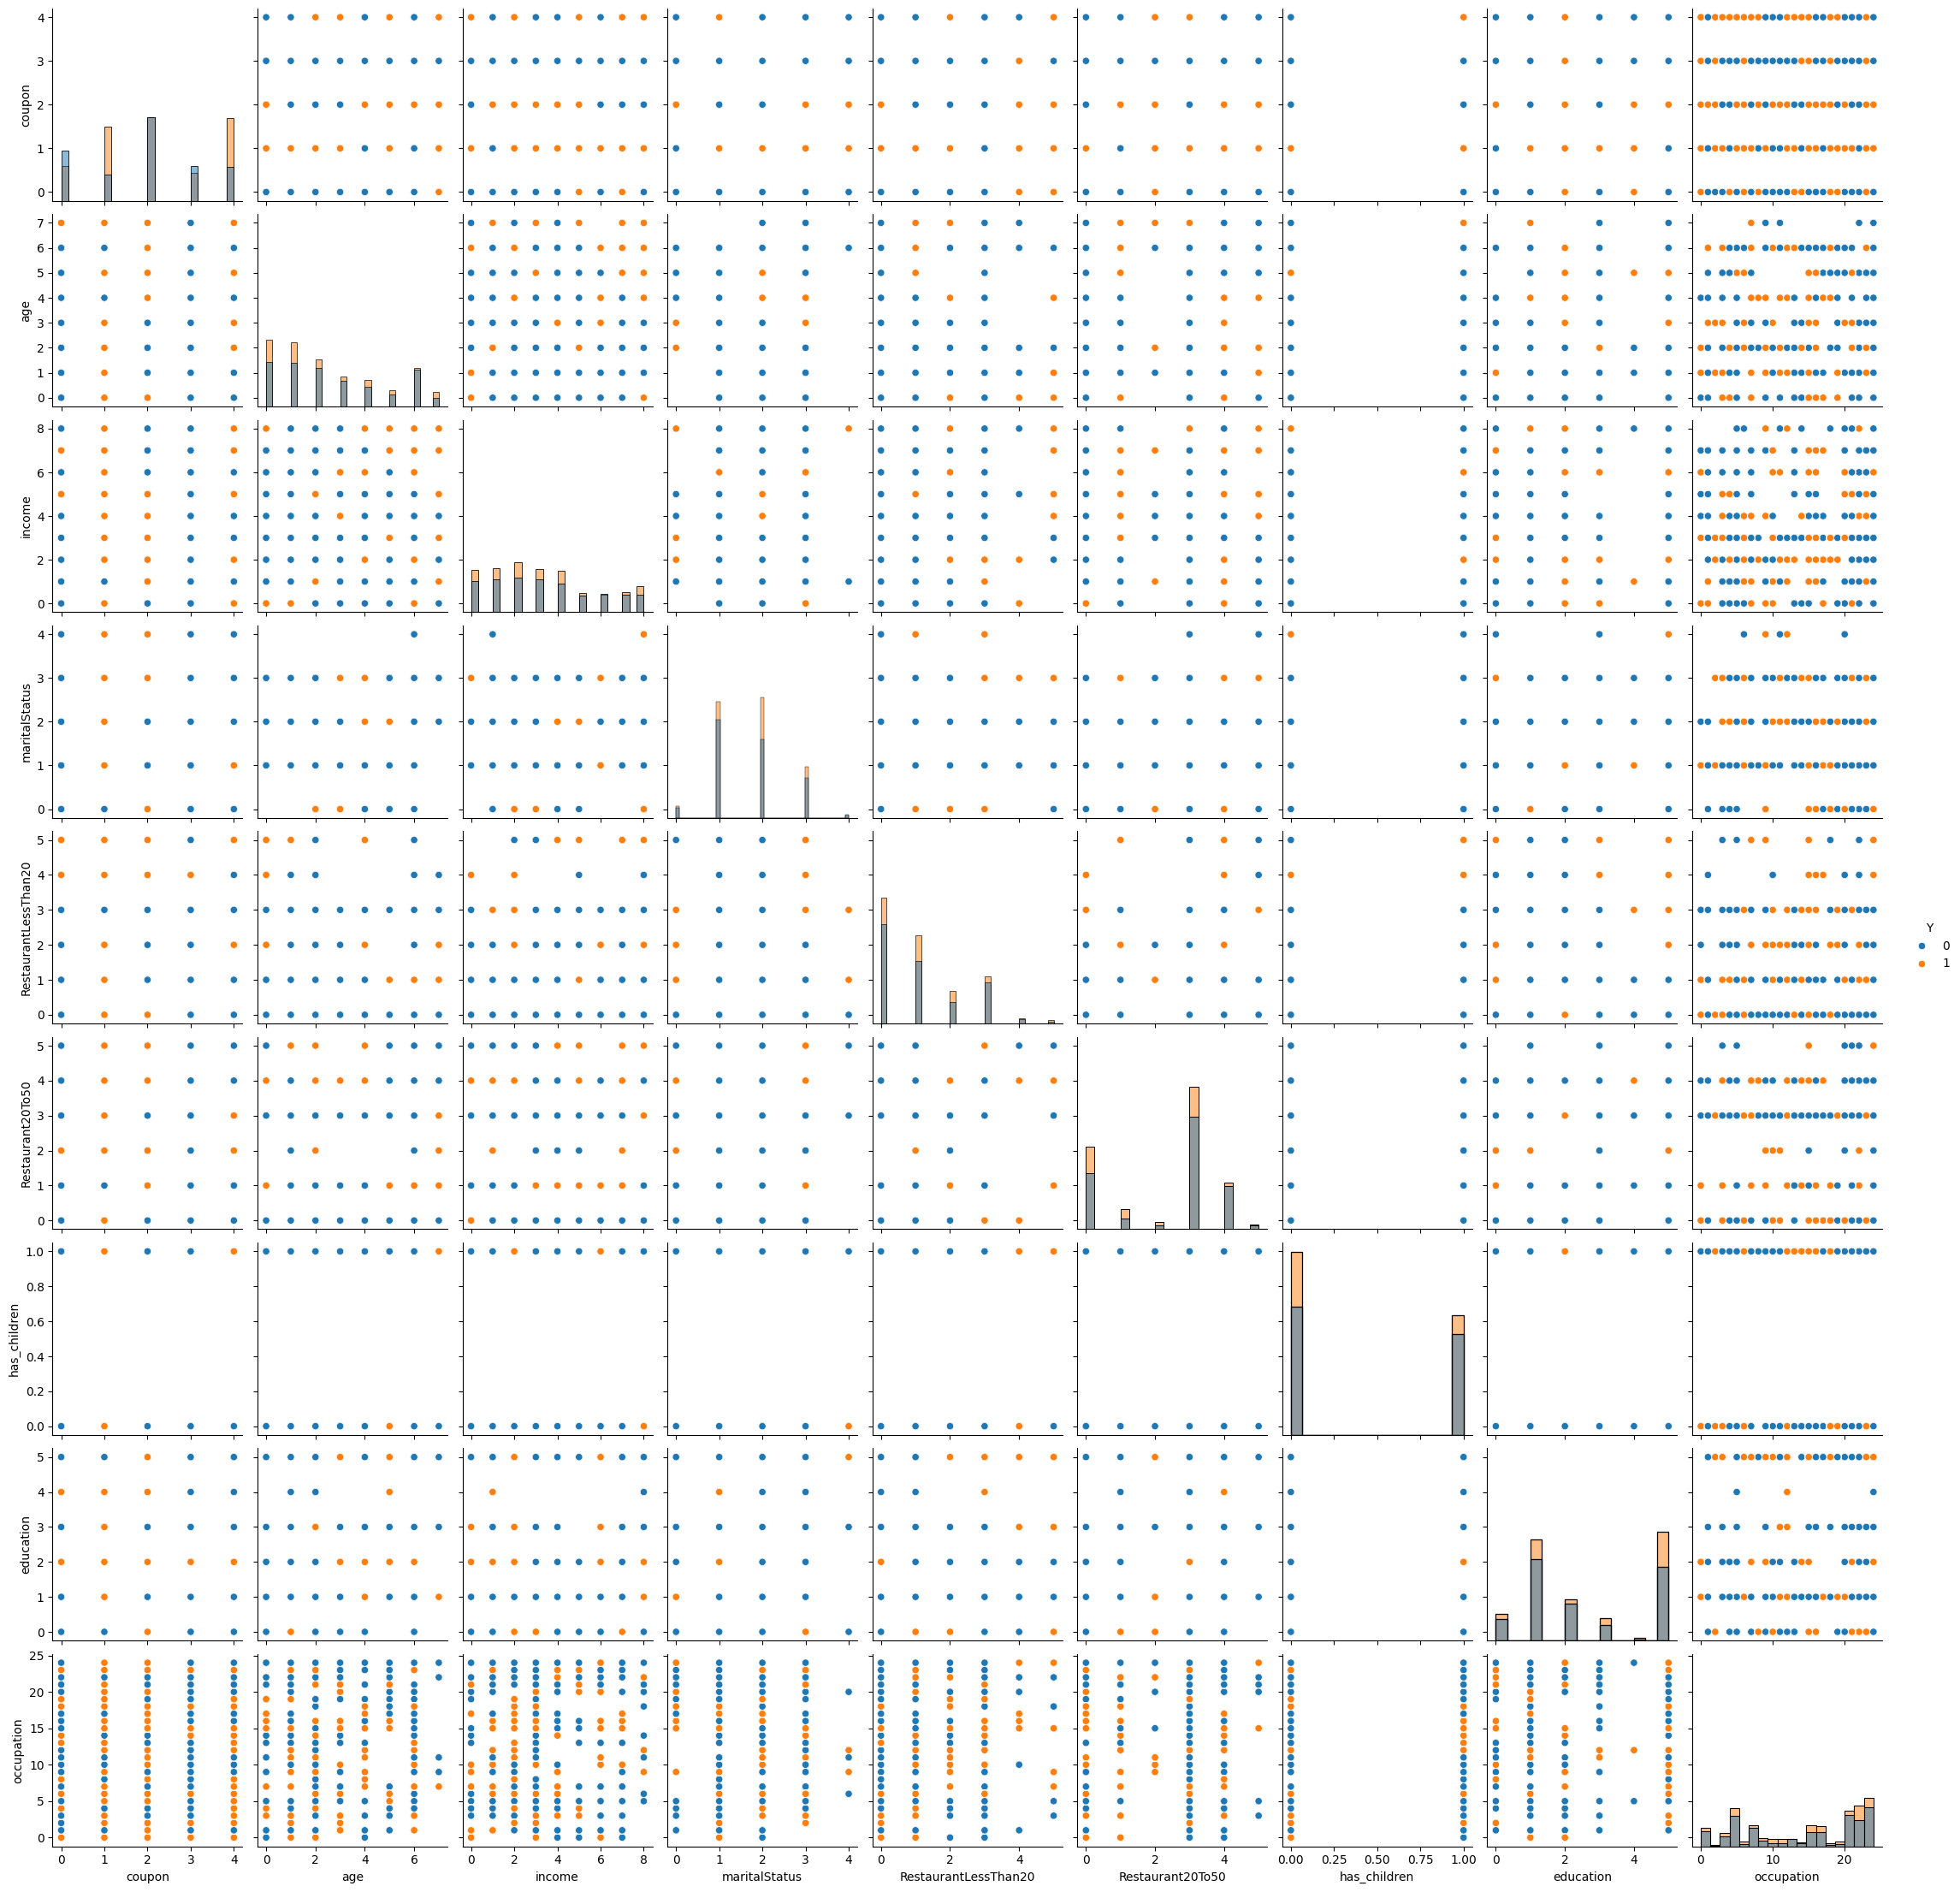

In [132]:



data = pd.read_csv('data/coupons.csv')
new_data=data[['coupon','Y','age','income','maritalStatus','RestaurantLessThan20','Restaurant20To50','has_children','education','occupation']]
new_data = label_encode(new_data)

    

sns.pairplot(new_data, hue='Y',diag_kind='hist')




#### Pair plot shows that the following type of drivers are likely to accept the coupon:
1. Copons for 'Carry out & Take away' and 'Restaurant(20-50)' are most likely to be accepted
2. Drivers with age 21 or 46 
3. Drivers with income less than $62500 or more than $100,000 
4. Single drivers 
5. Drivers who have never gone to a cheap restaurant 1-8 times a month
6. Drivers who have never gone to a good restaurant 0-3 times a month 
7. Drivers who have no kid 
8. Drivers who has'Bachelors degree' or 'Some college - no degree' 
9. Drivers who has friends as passanger 
9  Drivers with occupation as 'Transportation & Material Moving'



#### Investigate in what occasions that drivers are more likely to accept coupons

Mapping for column 'coupon': {0: 'Bar', 1: 'Carry out & Take away', 2: 'Coffee House', 3: 'Restaurant(20-50)', 4: 'Restaurant(<20)'}
Mapping for column 'Y': {0: 0, 1: 1}
Mapping for column 'expiration': {0: '1d', 1: '2h'}
Mapping for column 'time': {0: '10AM', 1: '10PM', 2: '2PM', 3: '6PM', 4: '7AM'}
Mapping for column 'temperature': {0: 30, 1: 55, 2: 80}
Mapping for column 'weather': {0: 'Rainy', 1: 'Snowy', 2: 'Sunny'}
Mapping for column 'passanger': {0: 'Alone', 1: 'Friend(s)', 2: 'Kid(s)', 3: 'Partner'}


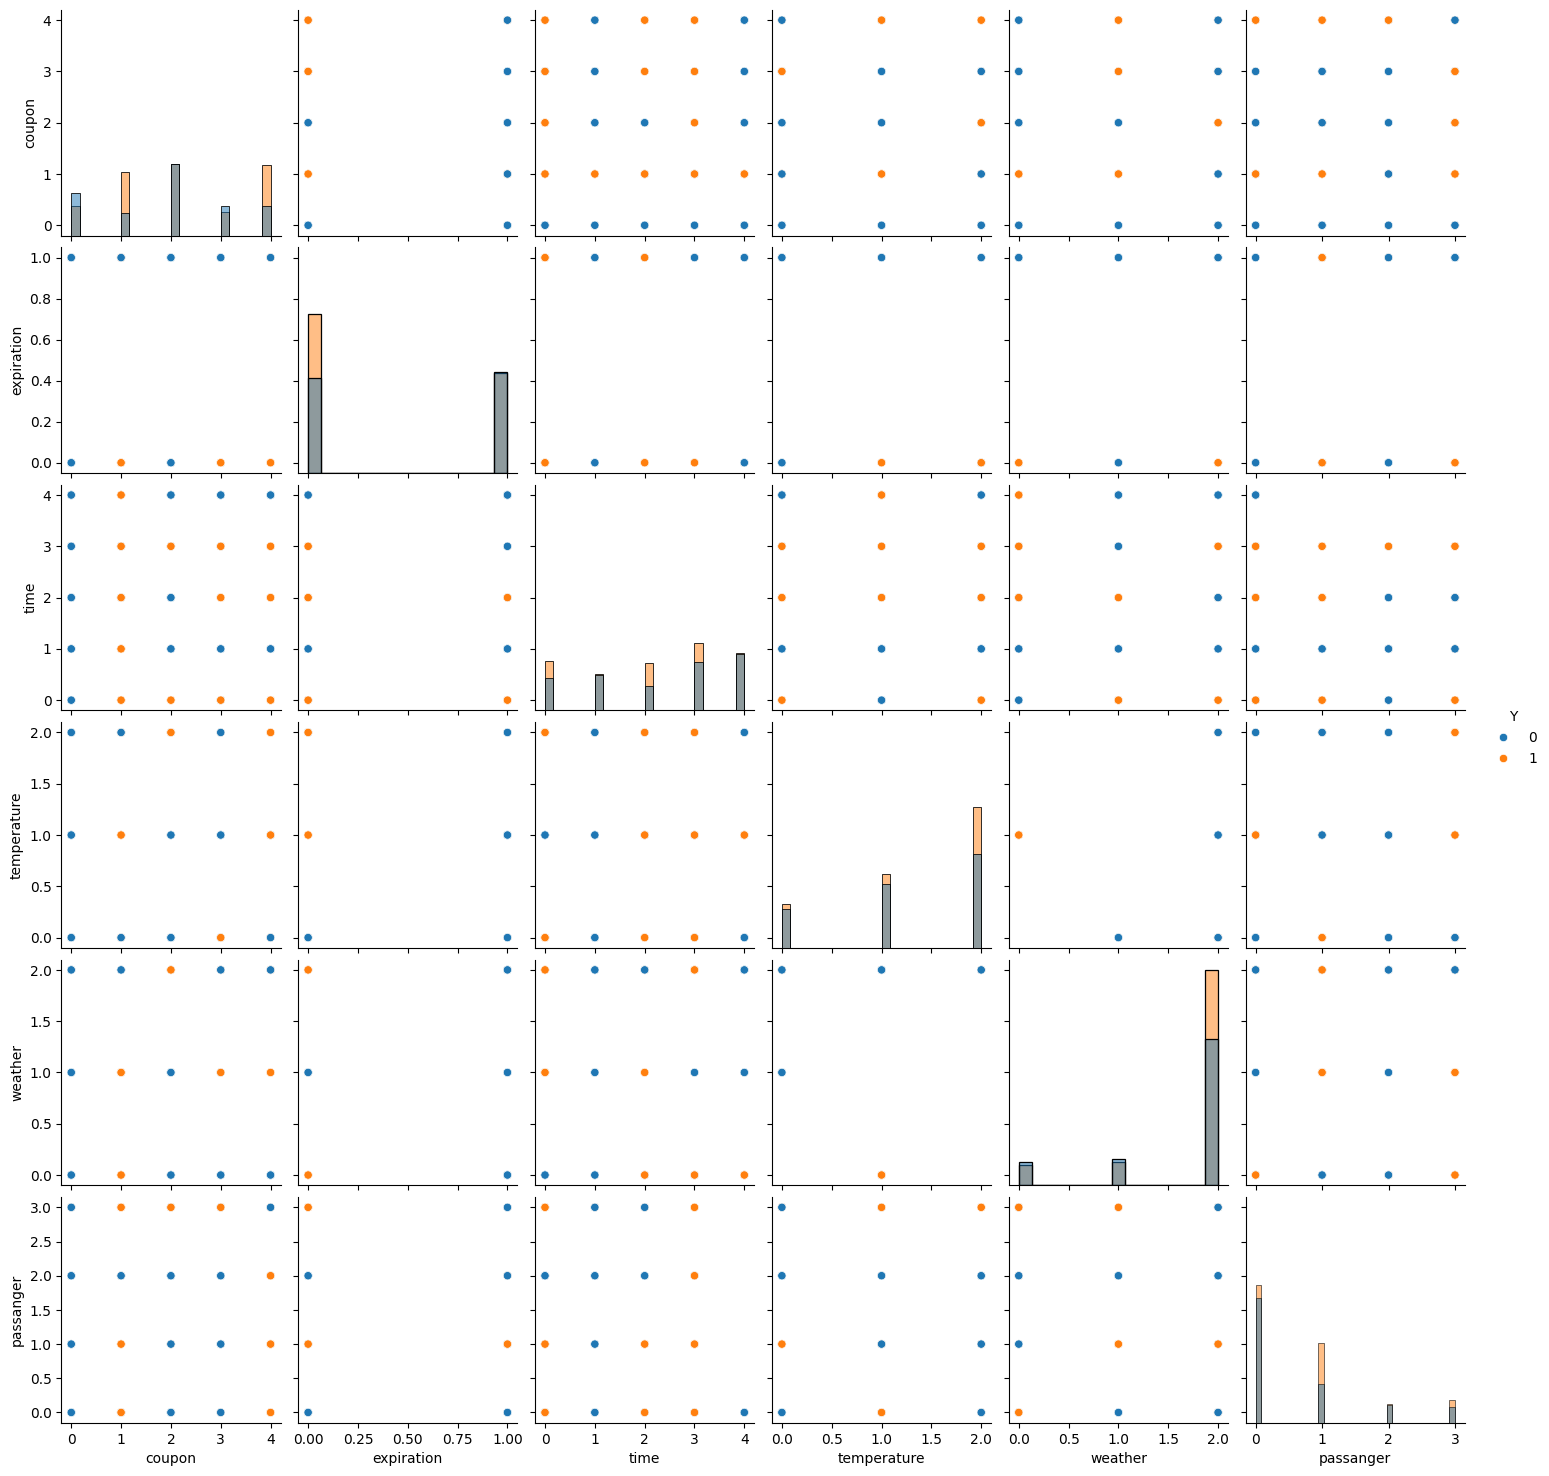

In [133]:

data = pd.read_csv('data/coupons.csv')
new_data=data[['coupon','Y','expiration','time','temperature','weather','passanger']]
new_data = label_encode(new_data)


sns.pairplot(new_data, hue='Y',diag_kind='hist')

#### The pair plot above shows that the following factors leads drivers accept the coupon more likely:
1. Copons for 'Carry out & Take away' and 'Restaurant(20-50)' are most likely to be accepted
2. Coupons expires in 1 day
3. Time is before lunch or dinner: 10AM', '2PM',  '6PM' 
3. Temperature is 80F which is more pleasant 
4. Weather is Sunny 
5. Drivers who have never gone to a cheap restaurant 1-8 times a month
6. Drivers who have never gone to a good restaurant 0-3 times a month 
7. Drivers who have no kid 
8. Drivers who has'Bachelors degree' or 'Some college - no degree' 
9. Drivers who has friends as passanger 

### 

### Investigate which columns are more impomportant for predicting the acceptance of the coupon, top 10 will be selected
    Here are the top 10 columns that most important for the prediction of the acceptance of the coupon:
               Feature    Importance
                coupon    0.110042
            occupation    0.088012
                income    0.075594
           CoffeeHouse    0.067565
                   age    0.064630
                  time    0.055261
                   Bar    0.054039
             education    0.050205
             CarryAway    0.049175
  RestaurantLessThan20    0.047233

                 Feature  Importance
5                 coupon    0.109807
12            occupation    0.087241
13                income    0.073759
16           CoffeeHouse    0.065953
8                    age    0.064451
4                   time    0.055843
15                   Bar    0.054044
11             education    0.050266
17             CarryAway    0.048410
18  RestaurantLessThan20    0.047162


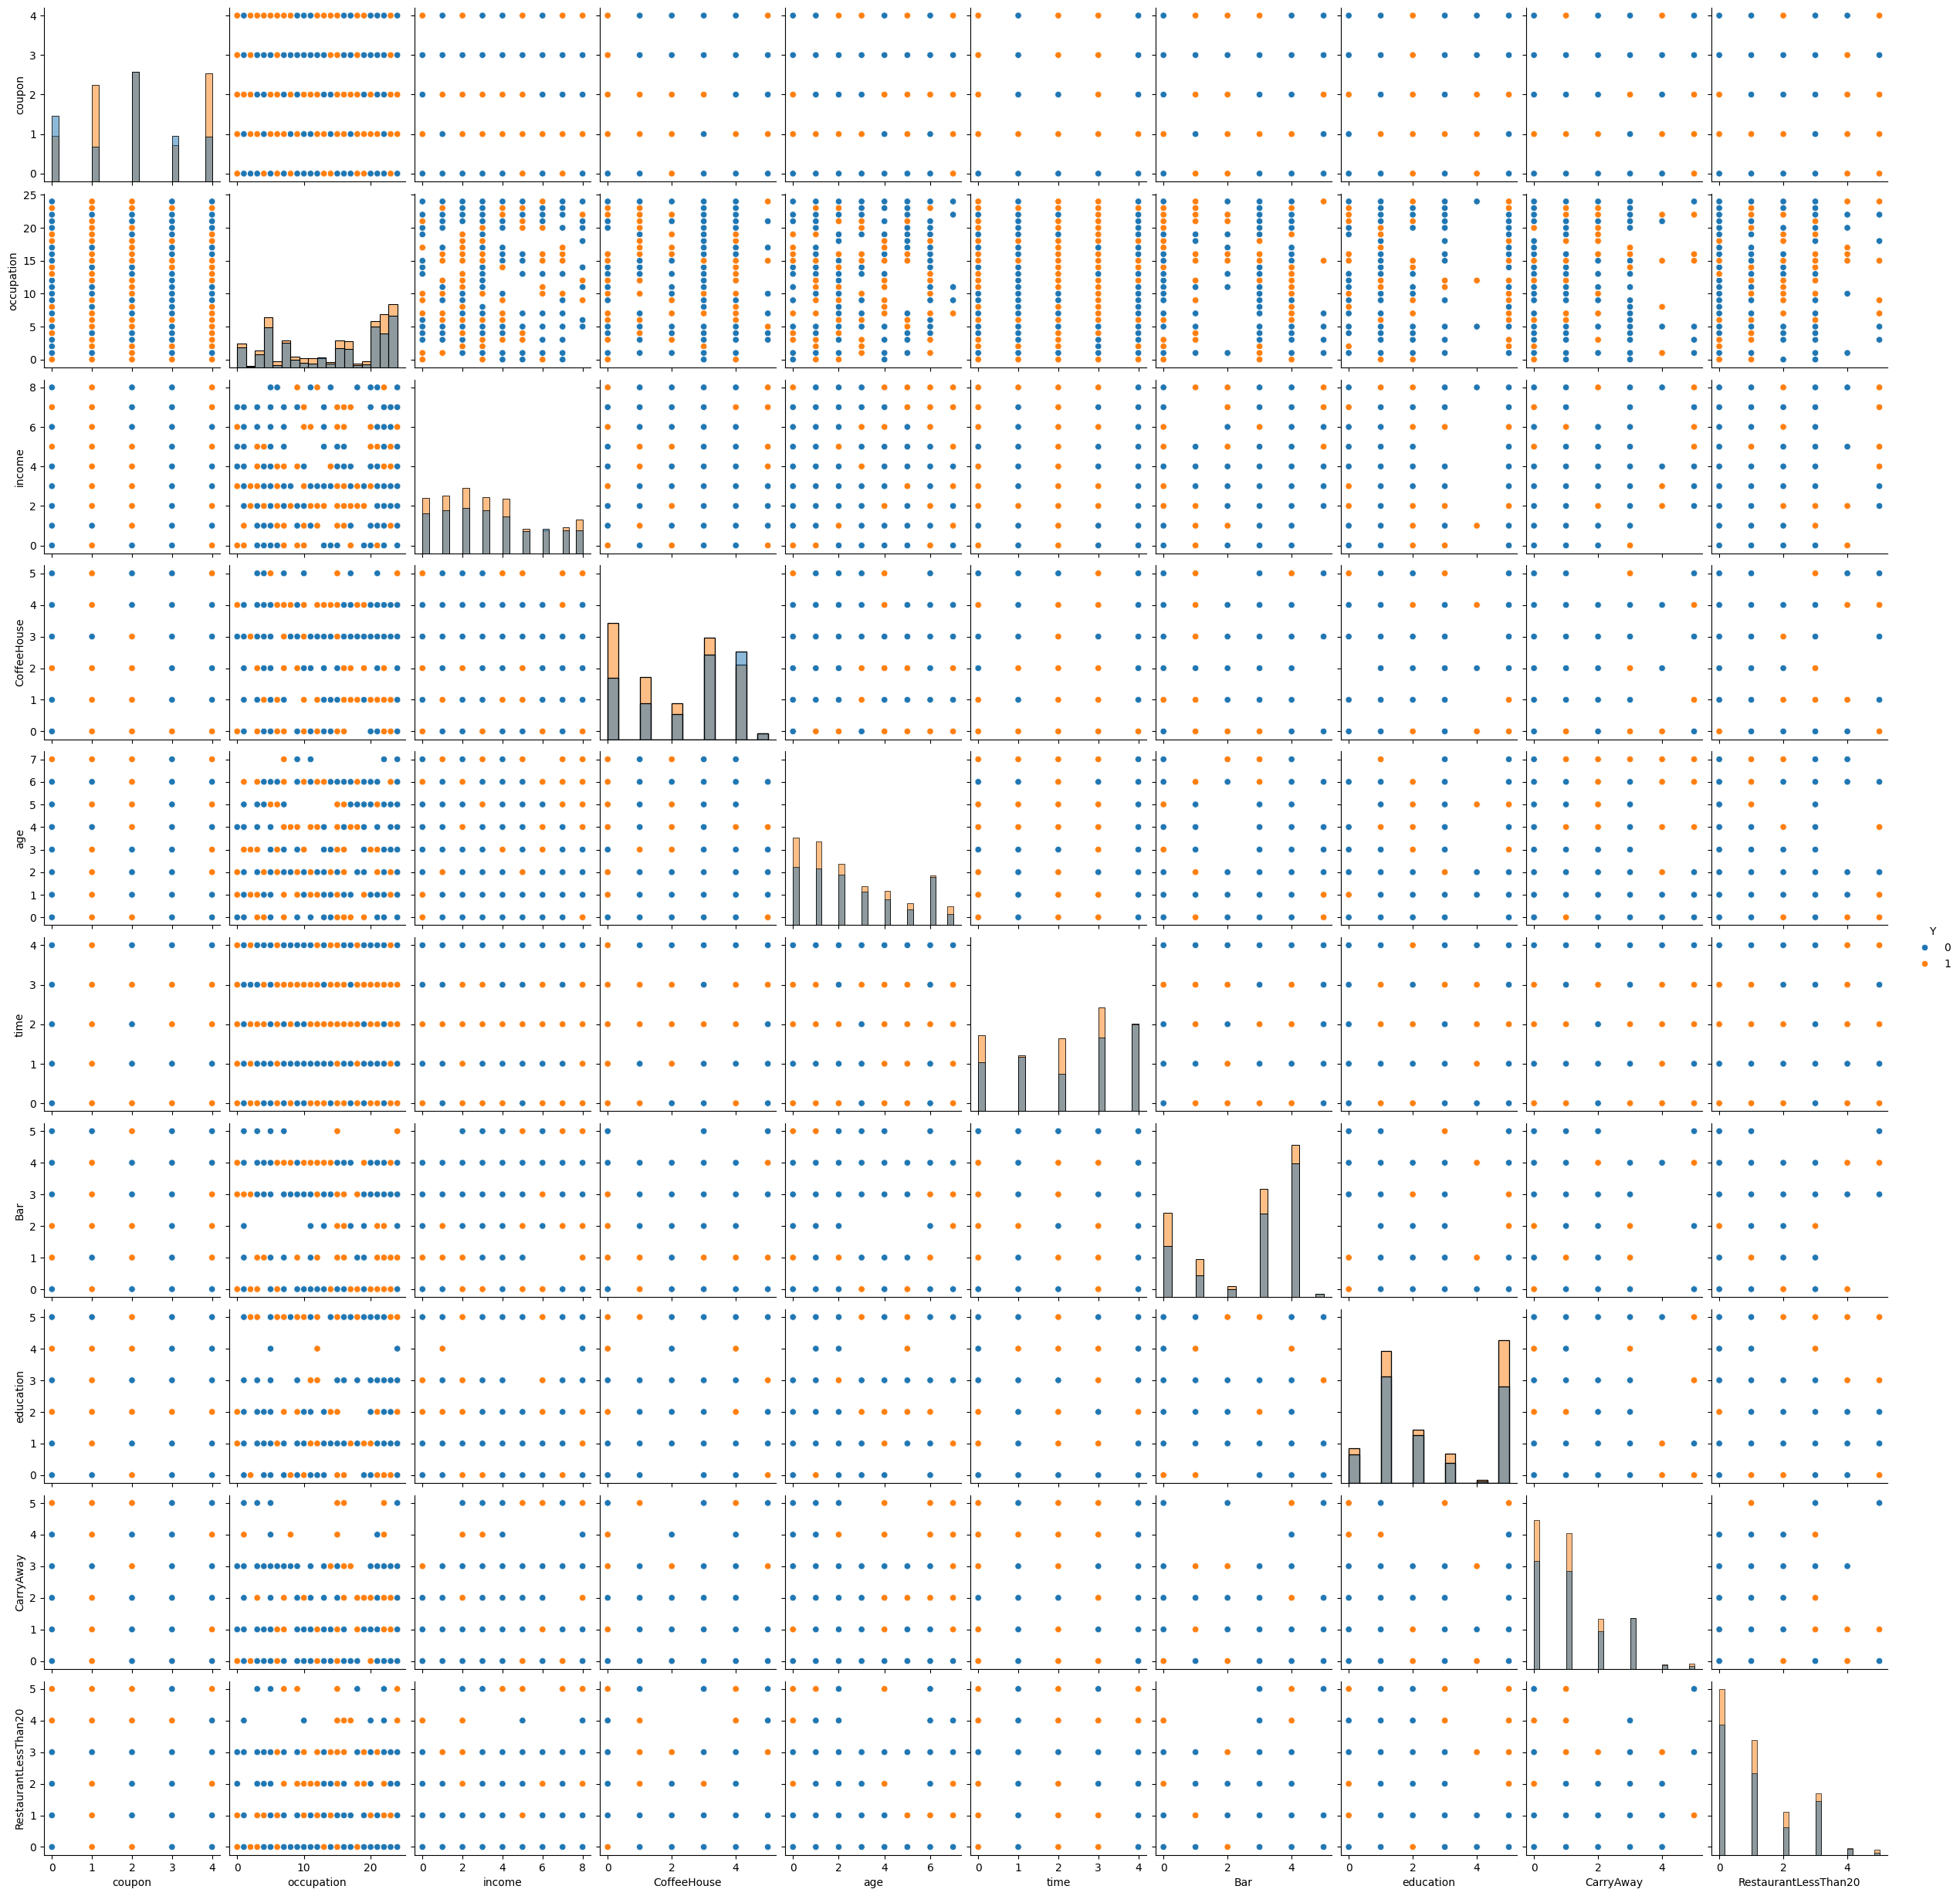

In [ ]:
from sklearn.ensemble import RandomForestClassifier
columns= data.columns
#columns=columns.drop('Y')

new_data=data[columns]
new_data = label_encode(new_data)

y= new_data['Y']
X= new_data.drop('Y', axis=1)

model = RandomForestClassifier()
model.fit(X, y)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
columns = feature_importance['Feature'].head(10).values
columns = np.append(columns, 'Y')


new_data =data[columns]
new_data = label_encode(new_data)
print('Top features most related to the target variable Y:')
print(feature_importance.head(10))

sns.pairplot(new_data, hue='Y',diag_kind='hist')
